# Аналитика в Яндекс.Афише

### Описание проекта
Необходимо помочь маркетологам оптимизировать маркетинговые затраты.
Есть данные с июня 2017 по конец мая 2018 года: лог сервера с данными о посещениях сайта компании, выгрузка всех заказов за этот период, статистика рекламных расходов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Изучение данных

In [2]:
# Считываем данные о посещении сайта 
visits = pd.read_csv('/datasets/visits_log.csv')

# Считываем данные о заказах 
orders = pd.read_csv('/datasets/orders_log.csv')

# Считываем данные о затратах на маркетинг 
costs = pd.read_csv('/datasets/costs.csv')

### Изучение visits

In [3]:
# Смотрим данные visits
visits.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
217225,touch,2017-12-06 12:31:00,2,2017-12-06 12:10:00,5641186798437315618
211416,touch,2018-02-17 20:06:00,3,2018-02-17 20:06:00,16649395602378494554
184443,desktop,2018-02-05 15:56:00,3,2018-02-05 15:56:00,16867240524765969171
101716,desktop,2018-03-16 11:40:00,2,2018-03-16 11:20:00,11572697823101964561
336264,desktop,2017-07-10 23:00:00,5,2017-07-10 22:33:00,6420696966792439604
110893,touch,2018-05-31 15:58:00,3,2018-05-31 15:40:00,3980785744669357447
253034,desktop,2017-10-17 23:29:00,4,2017-10-17 22:28:00,13685232232409911536
299053,desktop,2018-01-31 09:59:00,3,2018-01-31 09:37:00,9697960124521142213
223291,desktop,2017-10-14 15:16:00,3,2017-10-14 15:03:00,11191584928160183861
277363,touch,2018-03-09 11:38:00,9,2018-03-09 11:37:00,18100265154642644149


In [4]:
# Данные о массиве visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
# Количество дубликатов в visits
visits.duplicated().sum()

0

In [6]:
# Количество пропусков в visits
visits.isna().mean()

Device       0.0
End Ts       0.0
Source Id    0.0
Start Ts     0.0
Uid          0.0
dtype: float64

### Изучение orders

In [7]:
# Смотрим данные orders
orders.sample(10)

,Buy Ts,Revenue,Uid
17245,2017-11-13 10:48:00,8.43,6731421022966725351
13397,2017-10-18 13:51:00,4.03,16706179606221491751
23402,2017-12-11 17:21:00,5.13,12122753775424927052
36094,2018-02-21 10:25:00,1.59,5139615590553126732
20658,2017-11-28 14:06:00,0.15,4627890001757671730
43825,2018-04-11 22:21:00,2.69,16969656353390147788
16313,2017-11-06 07:59:00,3.05,10942171159254145507
37869,2018-03-02 20:46:00,0.37,7569308542339665600
5991,2017-08-24 23:46:00,6.11,2877493252992682904
12064,2017-10-10 21:05:00,4.58,9374722258219391990


In [8]:
# Данные о массиве orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
# Количество дубликатов в orders
orders.duplicated().sum()

0

In [10]:
# Количество пропусков в orders
orders.isna().mean()

Buy Ts     0.0
Revenue    0.0
Uid        0.0
dtype: float64

### Изучение costs

In [11]:
# Смотрим данные costs
costs.sample(10)

,source_id,dt,costs
1069,3,2018-05-12,313.79
2425,10,2018-02-02,12.19
2380,10,2017-12-19,28.10
1688,5,2018-01-23,171.39
1734,5,2018-03-10,140.43
2090,9,2018-03-02,14.42
1904,9,2017-08-28,6.74
2539,10,2018-05-29,11.32
1849,9,2017-07-04,10.36
1347,4,2018-02-14,8.12


In [12]:
# Данные о массиве costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [13]:
# Количество дубликатов в costs
costs.duplicated().sum()

0

In [14]:
# Количество пропусков в costs
costs.isna().mean()

source_id    0.0
dt           0.0
costs        0.0
dtype: float64

## 1. Изучение данных. Выводы

* В массивах visits, orders, costs пропуски и дубликаты отсутствуют;
* В данных visits столбцы 'End Ts' и 'Start Ts' имеют тип object, что не соответствует смыслу данных. Необходимо перевести в data;
* В данных orders столбец 'Buy Ts' имеет тип object, что не соответствует смыслу данных. Необходимо перевести в data;
* В данных costs столбец 'dt' имеет тип object, что не соответствует смыслу данных. Необходимо перевести в data;
* Типы данных в остльных столбцах в массивах visits, orders, costs полностью соответствуют смыслу записанных в них данных.

## 2. Предобработка данных

Изменим тип данных в visits['End Ts'], visits['Start Ts'], orders['Buy Ts'], costs['dt'] с object на data

In [15]:
# Изменение типа данных с object на data в visits
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

# Проверка
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [16]:
# Изменение типа данных с object на data в orders
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Проверка
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [17]:
# Изменение типа данных с object на data в costs
costs['dt'] = pd.to_datetime(costs['dt'])

# Проверка
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## 3. Исследовательский анализ

#### Изучение продукта
* Сколько людей пользуются в день, неделю, месяц?
* Сколько сессий в день?
* Сколько длится одна сессия?
* Как часто люди возвращаются?

In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [19]:
visits['Start Ts'].min()

Timestamp('2017-06-01 00:01:00')

In [20]:
visits['Start Ts'].max()

Timestamp('2018-05-31 23:59:00')

Выделим день, неделю, месяц, год в visits['Start Ts'] и запишем их в соответствующие столбцы

In [21]:
visits['Start Ts_year'] = visits['Start Ts'].dt.year
visits['Start Ts_month'] = visits['Start Ts'].dt.month
visits['Start Ts_week'] = visits['Start Ts'].dt.week
visits['Start Ts_date'] = visits['Start Ts'].dt.date

visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid,Start Ts_year,Start Ts_month,Start Ts_week,Start Ts_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Посмотрим с каких устройств заходят пользователи.

In [22]:
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

### Рассчитаем среднее количество уникальных пользователей в день dau_device по устройствам

In [23]:
t = visits.groupby(['Device','Start Ts_date']).agg({'Uid':'nunique'})
dau_device = t.groupby(['Device']).agg({'Uid':'mean'}).reset_index()
dau_device.columns = ['Device', 'dau']
dau_device

,Device,dau
0,desktop,659.244505
1,touch,252.873278


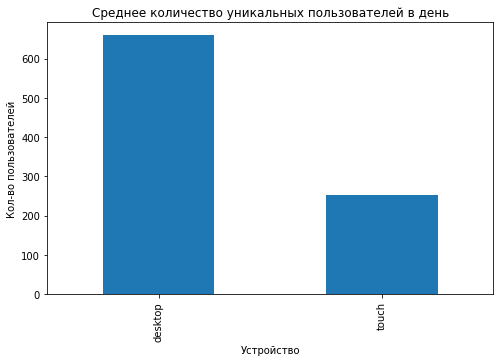

In [24]:
dau_device.groupby('Device')['dau'].mean().plot(y='dau', kind='bar', figsize=(8,5))

plt.title('Среднее количество уникальных пользователей в день')
plt.xlabel('Устройство')
plt.ylabel('Кол-во пользователей')
plt.show()

### Рассчитаем среднее количество уникальных пользователей в неделю по устройствам wau_device

In [25]:
d = visits.groupby(['Device', 'Start Ts_year', 'Start Ts_week']).agg({'Uid':'nunique'})
wau_device = d.groupby(['Device']).agg({'Uid':'mean'}).reset_index()
wau_device.columns = ['Device', 'wau']
wau_device

,Device,wau
0,desktop,4129.509434
1,touch,1634.924528


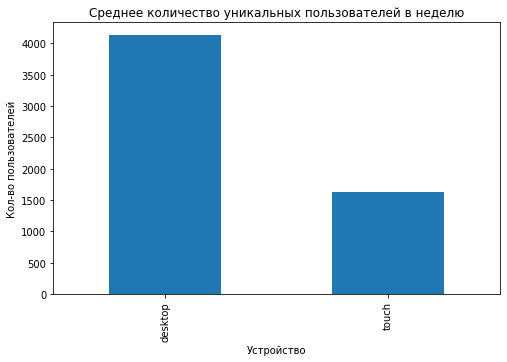

In [26]:
wau_device.groupby('Device')['wau'].mean().plot(y='wau', kind='bar', figsize=(8,5))

plt.title('Среднее количество уникальных пользователей в неделю')
plt.xlabel('Устройство')
plt.ylabel('Кол-во пользователей')
plt.show()

### Рассчитаем среднее количество уникальных пользователей в месяц по устройствам mau_device

In [27]:
m = visits.groupby(['Device', 'Start Ts_year', 'Start Ts_month']).agg({'Uid':'nunique'})
mau_device = m.groupby(['Device']).agg({'Uid':'mean'}).reset_index()
mau_device.columns = ['Device', 'mau']
mau_device

,Device,mau
0,desktop,16724.916667
1,touch,6825.916667


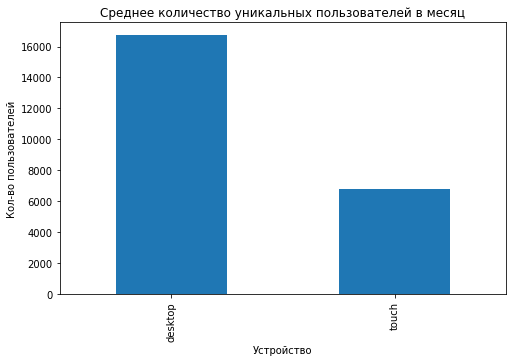

In [28]:
mau_device.groupby('Device')['mau'].mean().plot(y='mau', kind='bar', figsize=(8,5))

plt.title('Среднее количество уникальных пользователей в месяц')
plt.xlabel('Устройство')
plt.ylabel('Кол-во пользователей')
plt.show()

<div class="alert alert-danger

Здорово, что расчитал метрики DAU, WAU, MAU с разбивкой по устройствам. Но средние показаетли к сожалению практически не очень не говорят. Было бы супер посмотреть на них в динамике. Возможно, тогда мы сможем увидеть аномалии? Или сезонность в активности пользователей. Да и поймем, какой тренд</div>

### Рассчитаем среднее количество сессий в день по устройствам. В рассчет будем брать только те сессии, длительность которых больше нуля.

In [29]:
k = visits[(visits['Start Ts'] != visits['End Ts'])].groupby(['Device', 'Start Ts_date']).agg({'Start Ts_date': 'count'})
sessions_count_mean = k.groupby(['Device']).agg({'Start Ts_date':'mean'}).reset_index()
sessions_count_mean.columns = ['Device', 'sessions_count_mean']
sessions_count_mean

,Device,sessions_count_mean
0,desktop,656.258242
1,touch,233.410468


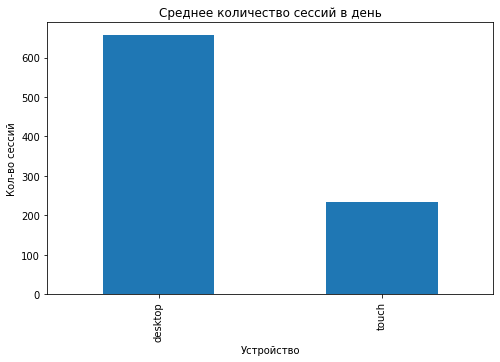

In [30]:
sessions_count_mean.groupby('Device')['sessions_count_mean'].mean().plot(y='sessions_count_mean', kind='bar', figsize=(8,5))

plt.title('Среднее количество сессий в день')
plt.xlabel('Устройство')
plt.ylabel('Кол-во сессий')
plt.show()

Рассчитаем длительность каждой сессии и запишем ее в столбец 'sessions_duration_sec'

In [31]:
visits['sessions_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,Start Ts_year,Start Ts_month,Start Ts_week,Start Ts_date,sessions_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


Text(0.5, 1.0, 'Распределение длительности сессий')

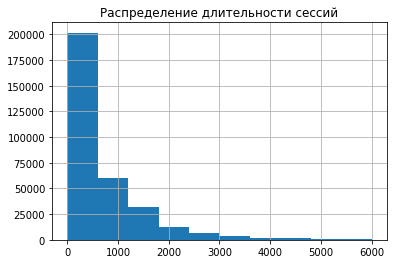

In [32]:
# Распределние длительности сессий без учета сессий с нулевой длительностью
visits[visits['sessions_duration_sec'] > 0]['sessions_duration_sec'].hist(range=(0,6000))
plt.title('Распределение длительности сессий')

### Средняя длительность сессии по устройствам в секундах.

In [33]:
visits[visits['sessions_duration_sec'] > 0].groupby('Device').agg({'sessions_duration_sec':'mean'})

,sessions_duration_sec
Device,
desktop,773.755834
touch,548.142125


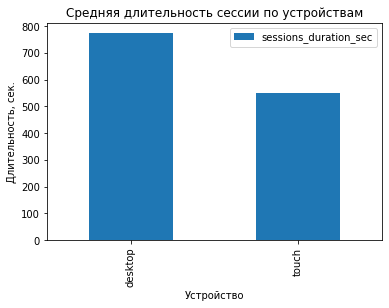

In [34]:
visits[visits['sessions_duration_sec'] > 0].groupby('Device').agg({'sessions_duration_sec':'mean'}).plot.bar()

plt.title('Средняя длительность сессии по устройствам')
plt.xlabel('Устройство')
plt.ylabel('Длительность, сек.')
plt.show()

### Мода длительности сессии desktop. Наиболее часто встречающаяся длительность сессии. 

In [35]:
visits[(visits['sessions_duration_sec'] > 0) & (visits['Device'] == 'desktop')]['sessions_duration_sec'].mode()

0    60
dtype: int64

### Мода длительности сессии touch. Наиболее часто встречающаяся длительность сессии.

In [36]:
visits[(visits['sessions_duration_sec'] > 0) & (visits['Device'] == 'touch')]['sessions_duration_sec'].mode()

0    60
dtype: int64

Надем среднюю и моду длительности сессии без учета устройства

In [37]:
# Мода длительности сессии без учета сессий с нулевой длительностью
visits[visits['sessions_duration_sec'] > 0]['sessions_duration_sec'].mode()

0    60
dtype: int64

In [38]:
# Средняя длительность сессии без учета сессий с нулевой длительностью
visits[visits['sessions_duration_sec'] > 0]['sessions_duration_sec'].mean()

714.684622658418

Посмотрим, как часто люди возвращаются, а именно рассчитаем Retention Rate. Показатель, отражающий сколько пользователей
из когорты относительно их изначального числа, вернулось в последующие периоды (количество активных пользоователей на n-ый lifetime / количество активных пользователей на 0 lifetime * 100%). Кагорты будем определять по месяцам.

Возьмем из visits только данные 'Uid' и 'Start Ts_date' и запишем их в user_activity

In [39]:
user_activity = visits[['Uid', 'Start Ts_date']]
user_activity.head()

,Uid,Start Ts_date
0,16879256277535980062,2017-12-20
1,104060357244891740,2018-02-19
2,7459035603376831527,2017-07-01
3,16174680259334210214,2018-05-20
4,9969694820036681168,2017-12-27


Найдем дату, когда пользователь впервые проявил активность добавим ее в user_activity.

In [40]:
first_activity_date = user_activity.groupby('Uid')['Start Ts_date'].min()
first_activity_date.name = 'first_activity_date'
user_activity = user_activity.join(first_activity_date, on='Uid')
user_activity.head()

,Uid,Start Ts_date,first_activity_date
0,16879256277535980062,2017-12-20,2017-12-20
1,104060357244891740,2018-02-19,2018-02-19
2,7459035603376831527,2017-07-01,2017-07-01
3,16174680259334210214,2018-05-20,2018-03-09
4,9969694820036681168,2017-12-27,2017-12-27


In [41]:
# Добавляем в user_activity столбец с месяцем первой активности
user_activity['first_activity_month'] = user_activity['first_activity_date'].astype('datetime64[M]')

# Добавляем в orders столбец с месяцем покупки
user_activity['activity_month'] = user_activity['Start Ts_date'].astype('datetime64[M]')

user_activity.head()

,Uid,Start Ts_date,first_activity_date,first_activity_month,activity_month
0,16879256277535980062,2017-12-20,2017-12-20,2017-12-01,2017-12-01
1,104060357244891740,2018-02-19,2018-02-19,2018-02-01,2018-02-01
2,7459035603376831527,2017-07-01,2017-07-01,2017-07-01,2017-07-01
3,16174680259334210214,2018-05-20,2018-03-09,2018-03-01,2018-05-01
4,9969694820036681168,2017-12-27,2017-12-27,2017-12-01,2017-12-01


Рассчитаем lifetime для каждой строки user_activity.

In [42]:
user_activity['cohort_lifetime'] = (user_activity['activity_month'] - user_activity['first_activity_month']) / np.timedelta64(1, 'M')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].round().astype('int')
user_activity.head()

,Uid,Start Ts_date,first_activity_date,first_activity_month,activity_month,cohort_lifetime
0,16879256277535980062,2017-12-20,2017-12-20,2017-12-01,2017-12-01,0
1,104060357244891740,2018-02-19,2018-02-19,2018-02-01,2018-02-01,0
2,7459035603376831527,2017-07-01,2017-07-01,2017-07-01,2017-07-01,0
3,16174680259334210214,2018-05-20,2018-03-09,2018-03-01,2018-05-01,2
4,9969694820036681168,2017-12-27,2017-12-27,2017-12-01,2017-12-01,0


Сгруппируем данные по когортам и ее возрасту. Посчитаем для каждой кагорты количество активных пользователей на определенный месяцжизни. 

In [43]:
cohorts_user_activity = user_activity.groupby(['first_activity_month', 'cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()

# Переименуем столбец Uid в cohort_users
cohorts_user_activity = cohorts_user_activity.rename(columns={'Uid':'cohort_users'})
cohorts_user_activity

,first_activity_month,cohort_lifetime,cohort_users
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


Найдем исходное количество пользователей в кагорте. Возьмем их число на нулевой месяц жизни.

In [44]:
initial_users_count = cohorts_user_activity[cohorts_user_activity['cohort_lifetime'] ==0][['first_activity_month', 'cohort_users']]

# Переименуем столбец cohort_users в cohort_users_start
initial_users_count = initial_users_count.rename(columns={'cohort_users':'cohort_users_start'})
initial_users_count

,first_activity_month,cohort_users_start
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Объединим данные по когортам cohorts_user_activity с исходным количеством пользователей в когорте initial_users_count.

In [45]:
cohorts_user_activity = cohorts_user_activity.merge(initial_users_count, on='first_activity_month')
cohorts_user_activity.head()

,first_activity_month,cohort_lifetime,cohort_users,cohort_users_start
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Расчитаем Retention Rate. Разделим количество активных пользователей в каждый месяц на исходное число пользователей в когорте.

In [46]:
cohorts_user_activity['retention'] = cohorts_user_activity['cohort_users'] / cohorts_user_activity['cohort_users_start']
cohorts_user_activity.head()

,first_activity_month,cohort_lifetime,cohort_users,cohort_users_start,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


Построим сводную таблицу из cohorts_user_activity.

### Retention Rate по когортам в зависимости от возраста когорты в месяцах. Показатель, отражающий сколько пользователей из когорты относительно их изначального числа, вернулось в последующие периоды

In [47]:
retention_pivot = cohorts_user_activity.pivot_table(index='first_activity_month',
                                                   columns='cohort_lifetime',
                                                   values='retention',
                                                   aggfunc='sum')
retention_pivot 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


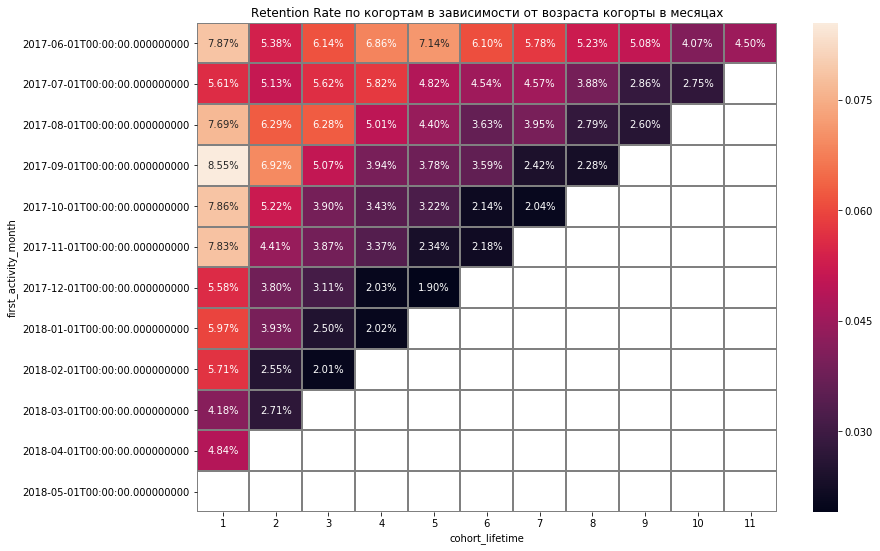

In [48]:
# Отобразим на тепловой карте retention_pivot
plt.figure(figsize=(13,9))
plt.title('Retention Rate по когортам в зависимости от возраста когорты в месяцах')
sns.heatmap(retention_pivot.iloc[:,1:12], annot=True, fmt='.2%', linewidths=1, linecolor='gray')

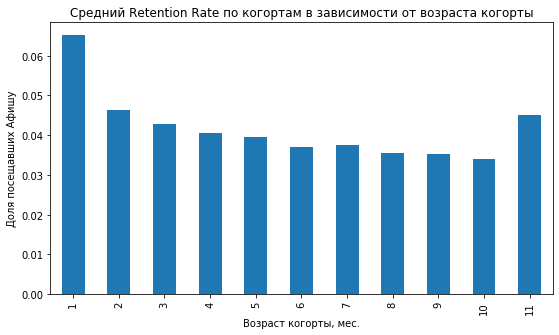

cohort_lifetime
0     1.000000
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

In [49]:
retention_pivot.iloc[:,1:12].mean(axis=0).plot.bar(figsize=(9,5))
plt.title('Средний Retention Rate по когортам в зависимости от возраста когорты')
plt.xlabel('Возраст когорты, мес.')
plt.ylabel('Доля посещавших Афишу')
plt.show()

retention_pivot.mean(axis=0)

#### Изучение продаж
* Когда люди начинают покупать?
* Сколько раз покупают за период?
* Какой средний чек?
* Сколько денег приносят? (LTV)

Сформируем кагорты по месяцам покупки.

In [50]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [51]:
# Определяем дату первого заказа для каждого пользователя
first_order_date_by_customers = orders.groupby('Uid')['Buy Ts'].min()
first_order_date_by_customers.name = 'first_order_date'

# Прописываем дату первого заказа пользователя в orders
orders = orders.join(first_order_date_by_customers, on='Uid')

orders.head()

,Buy Ts,Revenue,Uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [52]:
# Добавляем в orders столбец с месяцем первой покупки
orders['first_orders_month'] = orders['first_order_date'].astype('datetime64[M]')

# Добавляем в orders столбец с месяцем покупки
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

orders.head()

,Buy Ts,Revenue,Uid,first_order_date,first_orders_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


### Таблица №1. Количество уникальных пользователей сделавших закакз по месяцам в каждой кагорте.

In [53]:
orders.pivot_table(index='first_orders_month',
                  columns='order_month',
                  values='Uid',
                  aggfunc='nunique')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_orders_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


Ответим на вопрос когда люди начинают покупать. Для этого проанализируем время с первого визита до первой покупки.

Сделаем срез из visits только тех записей, где длительность сессии больше нуля. И возьмем только столбцы с рекламным источником, началом сессии и Uid.

In [54]:
uid_source = visits[visits['sessions_duration_sec'] > 0][['Uid', 'Source Id', 'Start Ts']]
uid_source.head()

,Uid,Source Id,Start Ts
0,16879256277535980062,4,2017-12-20 17:20:00
1,104060357244891740,2,2018-02-19 16:53:00
3,16174680259334210214,9,2018-05-20 10:59:00
5,16007536194108375387,5,2017-09-03 21:35:00
6,6661610529277171451,1,2018-01-30 11:13:00


In [55]:
# Найдем для каждого пользователя время начала самой первой сессии
uid_source_unique = uid_source.groupby(['Uid']).agg({'Start Ts': 'min'})
uid_source_unique.head()

,Start Ts
Uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00


In [56]:
# Добавим для каждого пользователя рекламный источник, который соответствовал его самому первому визиту 
uid_source_unique = pd.merge(uid_source_unique, uid_source, on=['Uid', 'Start Ts'])
uid_source_unique.head()

,Uid,Start Ts,Source Id
0,11863502262781,2018-03-01 17:27:00,3
1,49537067089222,2018-02-06 15:55:00,2
2,297729379853735,2017-06-07 18:47:00,3
3,313578113262317,2017-09-18 22:49:00,2
4,325320750514679,2017-09-30 14:29:00,5


Додавим в таблицу с заказами рекламный источник самой первой сессии юзера и его время.

In [57]:
orders_source = pd.merge(orders, uid_source_unique, on='Uid')
orders_source

,Buy Ts,Revenue,Uid,first_order_date,first_orders_month,order_month,Start Ts,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01 00:09:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:14:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01 00:14:00,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01 07:31:00,3
...,...,...,...,...,...,...,...,...
49936,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01,2018-05-31 09:11:00,4
49937,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01,2018-05-31 23:05:00,10
49938,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01,2018-05-31 23:52:00,3
49939,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01,2017-10-23 12:32:00,3


Сгруппируем таблицу, в которой для каждого юсера будет дата первой сессии, дата первой покупки и рекламный источник. 

In [58]:
orders_period = orders_source.groupby('Uid').agg({'first_order_date':'min', 'Start Ts':'min', 'Source Id':'mean'})
orders_period.head()

,first_order_date,Start Ts,Source Id
Uid,,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,2
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,3
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,5
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5


Добавим время между временем первого посещения и временем первого заказа.

In [59]:
orders_period['delta_minutes'] =  (orders_period['first_order_date'] - orders_period['Start Ts']).astype('timedelta64[m]')
orders_period.head()

,first_order_date,Start Ts,Source Id,delta_minutes
Uid,,,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,2,154022.0
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10,0.0
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,3,79.0
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,5,1184.0
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5,0.0


Посмотрим максимальное и минимальное значение delta_minutes, времени, которое проходит с первого посещения до первого заказа в минутах.

In [60]:
(orders_period['delta_minutes'].min(), orders_period['delta_minutes'].max())

(-472096.0, 523144.0)

Для анализа delta_minutes, времени, которое проходит с первого посещения до первого заказа в минутах будем брать только те заказы, где timedelta > 0.

### Построим диаграммы ящик с усами, распределения времени которое проходит с момента первого посещения до первого заказа для каждого рекламного источника.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


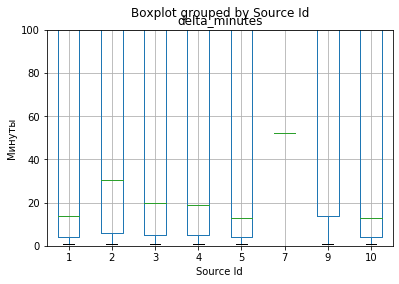

In [61]:
orders_period[orders_period['delta_minutes'] > 0].boxplot(column='delta_minutes', by='Source Id')
plt.ylim(0, 100)
plt.ylabel('Минуты')
plt.show()


Из диаграммы мы видим, что почти из всех рекламных источников больше половины всех первых покупок пользователей совершаются в течении первых 20 минут с момента первого посещения приложения. При этом есть покупки, которые совершаются через 60 и более минут. Возможно это связано с тем,что покупатели прерываются во время сессий на работу или прочие посторонние дела. 

### Рассчитаем для каждого рекламного источника средний чек по месяцам.

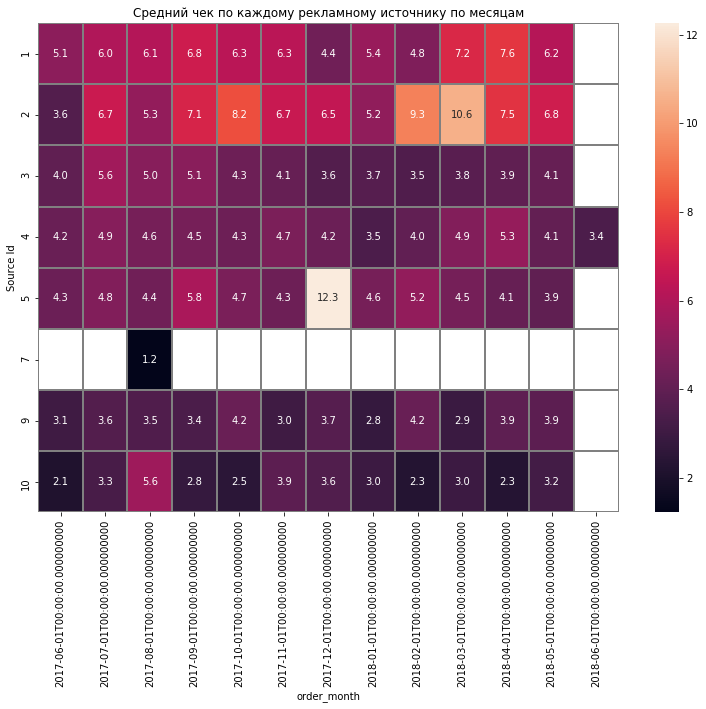

In [62]:
bill_by_source = orders_source.pivot_table(index='Source Id',
                         columns='order_month',
                         values='Revenue',
                         aggfunc='mean')

plt.figure(figsize=(13,9))
plt.title('Средний чек по каждому рекламному источнику по месяцам')
sns.heatmap(bill_by_source, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

### Средний чек для каждого рекламного источника.

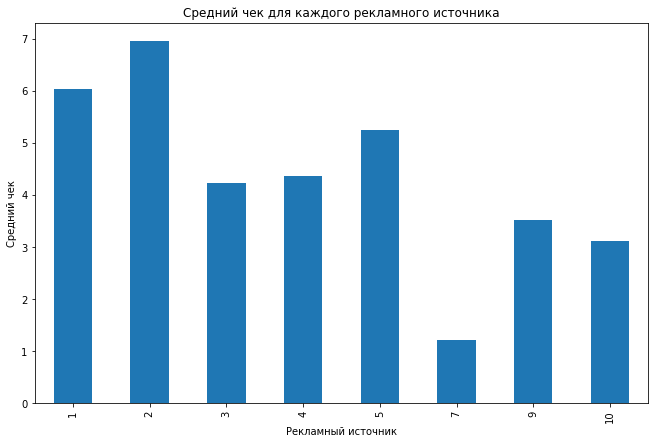

In [63]:
mean_bill_by_source = orders_source.pivot_table(index='Source Id',
                         columns='order_month',
                         values='Revenue',
                         aggfunc='mean').mean(axis=1).round(2)

mean_bill_by_source.plot.bar(figsize=(11, 7))
plt.title('Средний чек для каждого рекламного источника')
plt.xlabel('Рекламный источник')
plt.ylabel('Средний чек')
plt.show()

Рассчитаем средний доход с пользователя совершившего покупку для каждой кагорты по месяцам

In [64]:
# Посчитаем выручку и кол-во уникальных покупателей по кагортам по месяцам заказа
orders_grouped_by_cohorts = orders.groupby(['first_orders_month', 'order_month']).agg({'Revenue':'sum', 'Uid':'nunique'})
orders_grouped_by_cohorts.head()

Revenue   Uid
first_orders_month order_month               
2017-06-01         2017-06-01   9557.49  2023
                   2017-07-01    981.82    61
                   2017-08-01    885.34    50
                   2017-09-01   1931.30    54
                   2017-10-01   2068.58    88

In [65]:
# Найдем средний доход с пользователя совершившего покупку
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['Revenue'] / orders_grouped_by_cohorts['Uid']
orders_grouped_by_cohorts.head()

Revenue   Uid  revenue_per_user
first_orders_month order_month                                 
2017-06-01         2017-06-01   9557.49  2023          4.724414
                   2017-07-01    981.82    61         16.095410
                   2017-08-01    885.34    50         17.706800
                   2017-09-01   1931.30    54         35.764815
                   2017-10-01   2068.58    88         23.506591

### Таблица №2.  Средний доход с пользователя совершившего покупку для каждой кагорты по месяцам.

In [66]:
# Сводная таблица среднего дохода в кагортах по месяцам
orders_grouped_by_cohorts.pivot_table(index='first_orders_month',
                                     columns='order_month',
                                     values='revenue_per_user',
                                     aggfunc='mean').round(1)

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_orders_month,,,,,,,,,,,,,
2017-06-01,4.7,16.1,17.7,35.8,23.5,22.2,31.0,25.0,19.3,27.2,25.7,9.8,NaN
2017-07-01,NaN,6.0,12.4,21.0,10.8,6.9,7.9,6.4,7.0,7.4,12.9,11.5,NaN
2017-08-01,NaN,NaN,5.3,11.1,11.9,12.2,16.9,12.1,9.6,12.6,21.1,8.3,NaN
2017-09-01,NaN,NaN,NaN,5.6,22.2,13.4,138.7,19.9,26.1,27.4,17.0,11.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.0,11.3,6.8,7.4,7.1,7.3,6.6,7.5,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.2,7.3,6.8,12.5,7.5,4.6,7.6,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.7,7.8,39.4,48.1,27.4,23.5,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1,8.7,12.4,11.2,4.7,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,8.6,4.9,6.9,NaN


### Рассчитаем количество совершенных покупок по рекламным источникам по месяцам. 

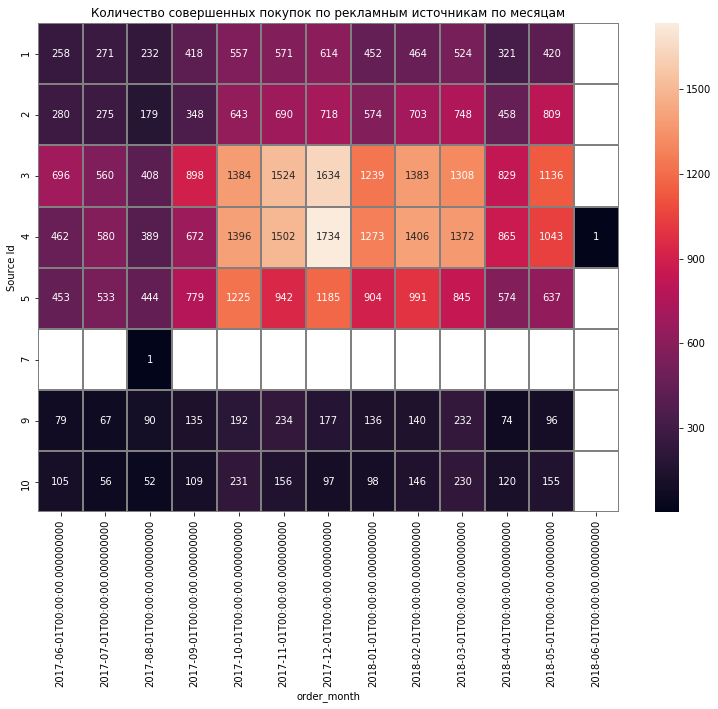

In [67]:
count_order_by_source = orders_source.pivot_table(index='Source Id',
                         columns='order_month',
                         values='Revenue',
                         aggfunc='count')

plt.figure(figsize=(13,9))
plt.title('Количество совершенных покупок по рекламным источникам по месяцам')
sns.heatmap(count_order_by_source, annot=True, fmt='.0f', linewidths=1, linecolor='gray')

### Количество совершенных покупок по месяцам

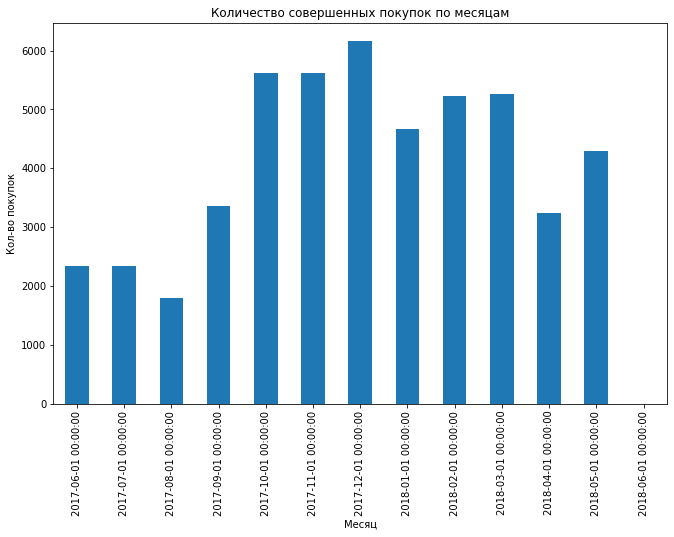

In [68]:
count_order_by_source.sum(axis=0).plot.bar(figsize=(11, 7))
plt.title('Количество совершенных покупок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во покупок')
plt.show()

Посчитаем количество новых покупателей n_buyers за каждый месяц

In [69]:
cohor_sizes = orders.groupby('first_orders_month').agg({'Uid':'nunique'}).reset_index()
cohor_sizes.columns = ['first_orders_month', 'n_buyers']
cohor_sizes

,first_orders_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс.

In [70]:
cohorts = orders.groupby(['first_orders_month', 'order_month']).agg({'Revenue':'sum'}).reset_index()
cohorts.head()

,first_orders_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим в таблицу cohorts данные о том, сколько пользователей первый раз совершили покупку в каждый месяц

In [71]:
report = pd.merge(cohor_sizes, cohorts, on='first_orders_month')
report.head()

,first_orders_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Добавим в таблицу таблицу report возраст кагорты на момент заказа

In [72]:
report['age'] = (report['order_month'] - report['first_orders_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_orders_month,n_buyers,order_month,Revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


Разделим прибыль кагорт за каждый месяц на общее число пользователей в каждой кагорте.

In [73]:
report['ltv'] = report['Revenue'] / report['n_buyers']


In [74]:
report.head()

,first_orders_month,n_buyers,order_month,Revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


Найдем среднюю прибыль с одного клиента накопительным итогом после месяца его первой покупки.

Найдем коммулятивную сумму прибыли с одного клиента в последующие месяцы после месяца его первой покупки.

In [75]:
# Посчитаем и приапендим вниз сводной таблицы кумулятивную сумму среднего 
w = report.pivot_table(index='first_orders_month',
                               columns='age',
                               values='ltv',
                               aggfunc='mean').mean(axis=0).cumsum(axis=0)
w.name='LTV_mean_by_month'

### Таблица №3. Средняя прибыль с одного клиента накопительным итогом после месяца его первой покупки.

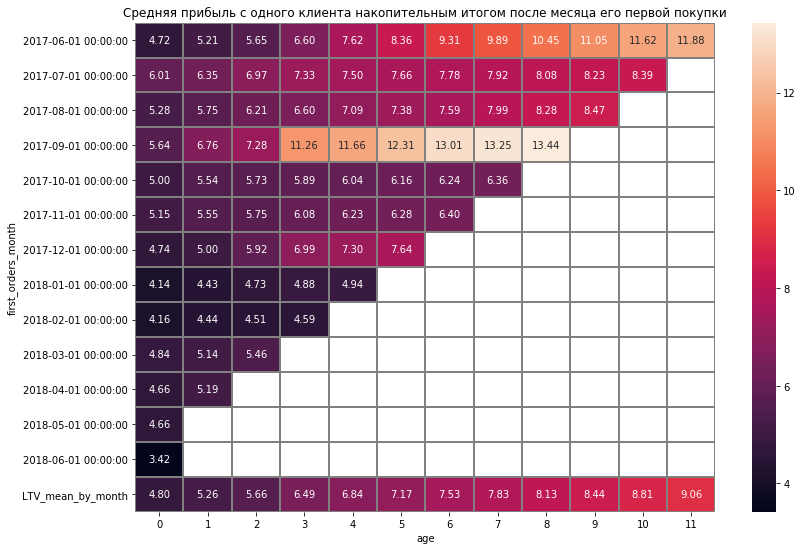

In [76]:
output_ltv = report.pivot_table(index='first_orders_month',
                               columns='age',
                               values='ltv',
                               aggfunc='mean').cumsum(axis=1)

output_ltv.fillna('')


output_ltv = output_ltv.append(w)

plt.figure(figsize=(13,9))
plt.title('Средняя прибыль с одного клиента накопительным итогом после месяца его первой покупки')
sns.heatmap(output_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

#### Изучение затрат на маркетинг
* Сколько денег потратили? Всего / на каждый источник / по времени
* Сколько стоило привлечение одного покупателя из каждого источника?
* На сколько окупились расходы? (ROMI)


In [77]:
# Выделим месяцы из дат в таблице маркетинговых затрат costs
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


### Таблица №4. Маркетинговые траты по источникам в зависимости от месяца.

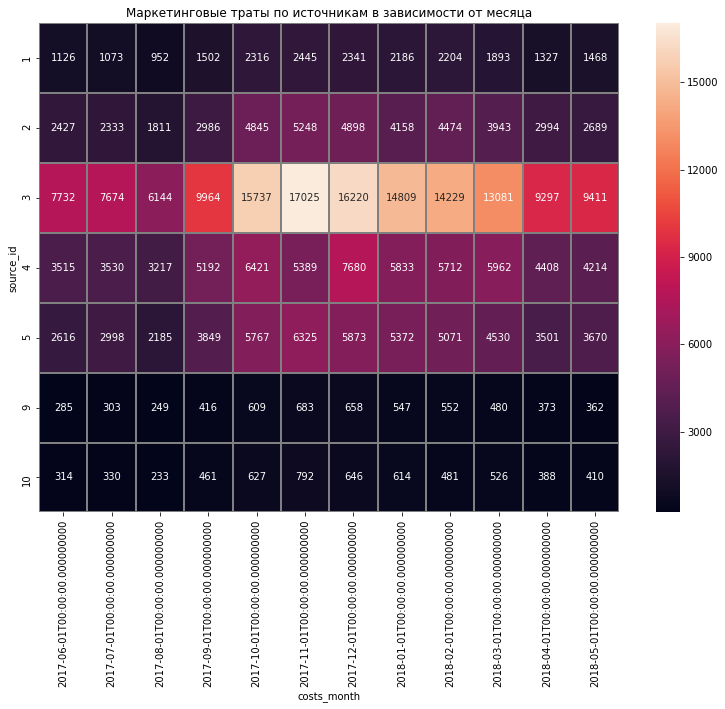

In [78]:
total_costs = costs.pivot_table(index='source_id',
                               columns='costs_month',
                               values='costs',
                               aggfunc='sum')

plt.figure(figsize=(13,9))
plt.title('Маркетинговые траты по источникам в зависимости от месяца')
sns.heatmap(total_costs, annot=True, fmt='.0f', linewidths=1, linecolor='gray')

### Итоговые маркетинговые затраты за весь период по источникам.

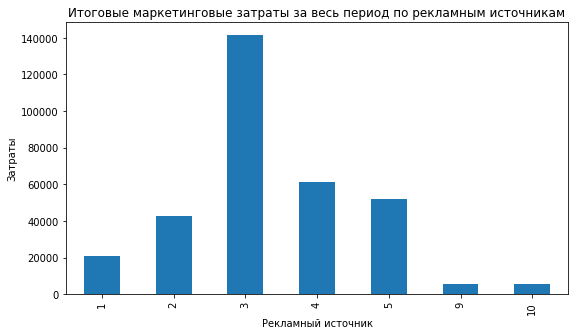

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [79]:
costs.groupby('source_id')['costs'].sum().plot.bar(figsize=(9,5))
plt.title('Итоговые маркетинговые затраты за весь период по рекламным источникам')
plt.xlabel('Рекламный источник')
plt.ylabel('Затраты')
plt.show()

total_costs_source = costs.groupby('source_id')['costs'].sum().reset_index()
total_costs_source.columns = ['source_id', 'costs']
total_costs_source

### Итоговые маркетинговые затраты по месяцам

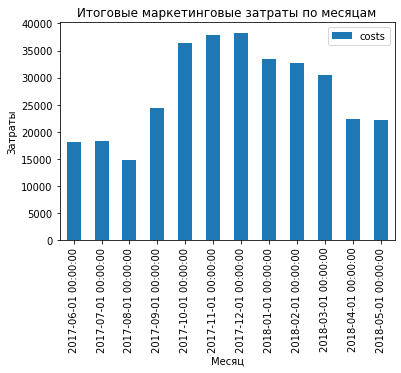

,costs
costs_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


In [80]:
monthly_costs = costs.groupby('costs_month').agg({'costs':'sum'})
monthly_costs.plot.bar()
plt.title('Итоговые маркетинговые затраты по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()

monthly_costs

Добавим маркетинговые затраты по кагортам в report и посчитаем CAC(стоимость привлечения одного покупателя). 

In [81]:
# Добавляем маркетинговые затраты
report_new = pd.merge(report, monthly_costs, left_on='first_orders_month', right_on='costs_month')
report_new.head()

,first_orders_month,n_buyers,order_month,Revenue,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0


In [82]:
# Добавляем CАС
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_orders_month,n_buyers,order_month,Revenue,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0,8.905091


### Стоимость привлечения одного покупателя в каждой кагорте.

In [83]:
report_new.groupby('first_orders_month').agg({'cac':'mean'})

,cac
first_orders_month,
2017-06-01,8.905091
2017-07-01,9.485486
2017-08-01,10.796015
2017-09-01,9.441654
2017-10-01,8.369327
2017-11-01,9.288870
2017-12-01,8.741809
2018-01-01,9.937302
2018-02-01,8.962758


### Рассчитаем ROMI (возврат на маркетинговые инвестиции). Выведем значение ROMI накопительным итогом для каждой недели жизни кагорты.

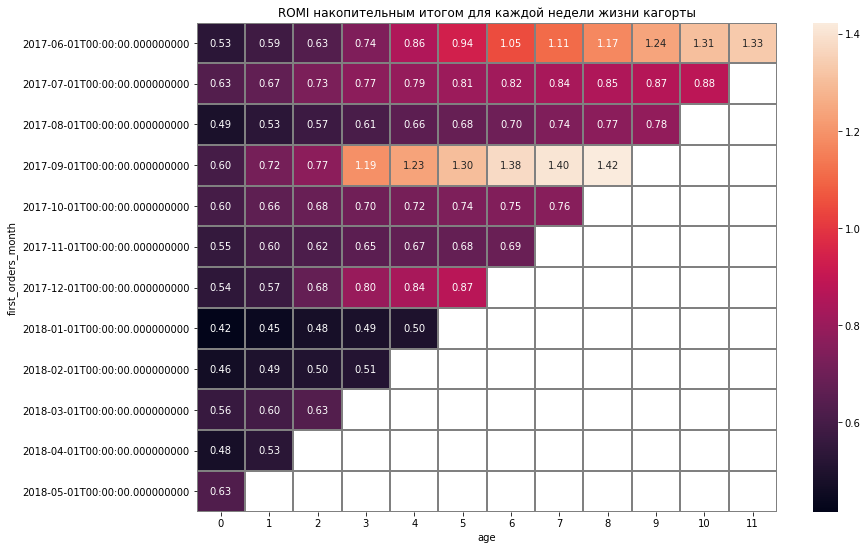

In [84]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output_romi = report_new.pivot_table(index='first_orders_month',
                                    columns='age',
                                    values='romi',
                                    aggfunc='mean').cumsum(axis=1)


plt.figure(figsize=(13,9))
plt.title('ROMI накопительным итогом для каждой недели жизни кагорты')
sns.heatmap(output_romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

Найдем сколько стоило привлечение одного покупателя из различных рекламных источников, а также узнаем окупились ли затраты на рекламные источники. Т.к. в разных сессиях одного и тогоже пользователя попадаются разные рекламные источники, то за рекламный источник мы считаем тот источник, который указан в самой первой сессии пользователя.

Посчитаем за весь период количество юзеров сделавших заказ по рекламному источнику самой первой сессии.

In [85]:
source_n_buyers =  orders_source.groupby('Source Id').agg({'Uid':'nunique'}).reset_index()
source_n_buyers.columns = ['Source_id', 'n_buyers']
source_n_buyers

,Source_id,n_buyers
0,1,2964
1,2,3515
2,3,10248
3,4,10113
4,5,6847
5,7,1
6,9,1087
7,10,1306


In [86]:
# Маркетинговые затраты по каждому источнику
total_costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Посчитаем прибыль по рекламным источникам за исследуемый период orders_source

In [87]:
orders_source.head()

,Buy Ts,Revenue,Uid,first_order_date,first_orders_month,order_month,Start Ts,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01 00:09:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01 00:14:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01 00:25:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01 00:14:00,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01 07:31:00,3


In [88]:
total_orders_source = orders_source.groupby('Source Id')['Revenue'].sum().reset_index()
total_orders_source.name = 'Source Id'
total_orders_source

,Source Id,Revenue
0,1,30537.37
1,2,47265.19
2,3,53061.62
3,4,55601.15
4,5,53352.23
5,7,1.22
6,9,5746.85
7,10,4611.73


Добавим за весь период маркетинговые затраты по каждому рекламному источнику в таблицу source_n_buyers.

In [89]:
source_n_buyers = pd.merge(source_n_buyers, total_costs_source, left_on='Source_id', right_on='source_id')
source_n_buyers

,Source_id,n_buyers,source_id,costs
0,1,2964,1,20833.27
1,2,3515,2,42806.04
2,3,10248,3,141321.63
3,4,10113,4,61073.60
4,5,6847,5,51757.10
5,9,1087,9,5517.49
6,10,1306,10,5822.49


Добавим за весь период прибыль по каждому рекламному источнику в таблицу source_n_buyers.

In [90]:
source_n_buyers = pd.merge(source_n_buyers, total_orders_source, left_on='Source_id', right_on='Source Id')

# Удалим ненужные столбцы
source_n_buyers = source_n_buyers[['Source_id', 'n_buyers', 'costs', 'Revenue']]
source_n_buyers

,Source_id,n_buyers,costs,Revenue
0,1,2964,20833.27,30537.37
1,2,3515,42806.04,47265.19
2,3,10248,141321.63,53061.62
3,4,10113,61073.60,55601.15
4,5,6847,51757.10,53352.23
5,9,1087,5517.49,5746.85
6,10,1306,5822.49,4611.73


### Определим насколько окупились рекламные источники за рассматриваемый период (roi)

In [91]:
source_n_buyers['roi'] = source_n_buyers['Revenue'] / source_n_buyers['costs']
source_n_buyers

,Source_id,n_buyers,costs,Revenue,roi
0,1,2964,20833.27,30537.37,1.465798
1,2,3515,42806.04,47265.19,1.104171
2,3,10248,141321.63,53061.62,0.375467
3,4,10113,61073.60,55601.15,0.910396
4,5,6847,51757.10,53352.23,1.030820
5,9,1087,5517.49,5746.85,1.041570
6,10,1306,5822.49,4611.73,0.792055


Из таблицы выше видим, что не все рекламные источники окупились за рассматриваемый период. 

Посчитаем CAC для каждого источника поделив затраты на каждый источник на количество покупателей из него.

### Таблица №5. Стоимость привлечения одного покупателя в зависимости от рекламного источника.

In [92]:
source_n_buyers['cac'] = source_n_buyers['costs'] / source_n_buyers['n_buyers']
source_n_buyers

,Source_id,n_buyers,costs,Revenue,roi,cac
0,1,2964,20833.27,30537.37,1.465798,7.028769
1,2,3515,42806.04,47265.19,1.104171,12.178105
2,3,10248,141321.63,53061.62,0.375467,13.790167
3,4,10113,61073.60,55601.15,0.910396,6.039118
4,5,6847,51757.10,53352.23,1.030820,7.559092
5,9,1087,5517.49,5746.85,1.041570,5.075888
6,10,1306,5822.49,4611.73,0.792055,4.458262


Text(0, 0.5, 'Стоимость привлечения')

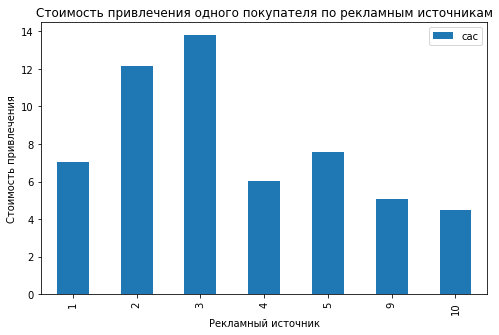

In [93]:
source_n_buyers.groupby('Source_id').agg({'cac':'mean'}).plot(kind='bar', figsize=(8,5))
plt.title('Стоимость привлечения одного покупателя по рекламным источникам')
plt.xlabel('Рекламный источник')
plt.ylabel('Стоимость привлечения')

## Выводы
Продукт
* Среднее количество уникальных пользователей в день, неделю и месяц с desktop более чем в 2 раза превышает количество пользователей с touch.
* Cреднее количество сессий  в день с desktop почти в три раза больше,чем с touch и составляет 656 и 233 сессии соответственно.
* Средняя длительность сессии составляет 714 секунд, а мода(наиболее часто встречающаяся длительность) равна 60 секунд. При этом мода для устройств desktop и touch одинакова и равна 60 с.
* В течение второго месяца после первого месяца в который была зафиксирована первая активность пользователя, снова обращаются к приложению только 6,5% пользователей. В дальнейшие месяцы этот показатель удерживается в районе 4% от начального количества пользователей в месячной когорте.

Продажи
* Почти из всех рекламных источников больше половины всех первых покупок пользователей совершаются в течении первых 20 минут с момента первого посещения приложения пользователем.
* Из Таблицы №1 видим, что: львиная доля пользователей, после того как сделает первую покупку в следующие месяцы больше покупок не совершает; приложение имеет явно выраженный сезонный рост продаж в октябре, ноябре и декабре которые составляли в 2017 году около 4300 руб.
* Из Таблицы №2 видим, что: средний доход с пользователя совершившего покупку для каждой кагорты по месяцам после первого месяца значительно возрастает - в несколько раз; показатель не имеет выраженного сезонного характера. Вероятнее всего такой рост связан с тем, что в последующие месяцы остаются в основном пользователи, которые совершают покупки в приложении регулярно и возможно даже не один раз в месяц.
* Самый высокий средний чек у рекламных источников номер 1 и 2 он равен 6.03 и 6.96 сответственно, а самый низкий у рекламных источников номер 9 и 10 (3.52 и 3.12 соответственно).
* Количество покупок за месяц в приложении сильно изменялось за исследуемый период от 2000 до 6000 в месяц. Наиболее удачными с этой точки зрения были месяцы с 2017-10 по 2018-03 включительно, когда в месяц совершалось более 5000 покупок.
* Из Таблицы №3 видим, что после совершения первой покупки средняя прибыль на одного клиента месячной когорты сильно снижается. Зачастую более чем в 10 раз. Это связано с тем, что львиная доля пользователей не совершают повторных покупок. Средняя коммулятивная прибыль с одного клиента (LTV) в месяц первой закупки составляет 4.8 рубля, а на одинадцатом месяце достигает 9.1 рублей.  

Маркетинговые затраты
* За весь период больше всего денег потрачено на рекламный источник под номером 3. На него тратится более чем в 2 раза больше, чем на любой другой рекламный источник.
* Больше всего денег тратится в октябре, ноябре и декабре. Стоит отметить, что в эти же месяцы отмечаются и самые высокие продажи.
* К сожалению по итогам мая 2018 года окупились только две кагорты: 2017-06-01 на 6-ом и 2017-09-01 на 3-ем месяце жизни. При этом кагорты 2017-07-01 и 2017-08-01 не окупились не смотря на свой возраст 10 и 9 месяцев. Таким образом целесообразность маркетинговых затрат требует дополнительного изучения и возможно корректировки.
* Самой высокой стоимостью привлечения одного покупателя обладают рекламные источники номер 2 и 3. Стоимость одного покупателя у них за исследуемый период составила 12.18 и 13.79 соответственно, а самой низкой рекламные источники 9 и 10 со средней стоимостью клиента 5.07 и 4.46 соответственно.
* За рассматриваемый период окупились рекламные источники номер 1, 2, 5, 9 и не окупились источники номер 3, 4, 10.

### Рекомендации
* С точки зрения коммерческой выгоды для крмпании наиболее интересными источниками являются рекламные источники 1, 2, 5 и 9, которые окупились за рассматриваемый период.
* Особого внимания заслуживает рекламный источник номер 1, т.к. за рассматриваемый период он имеет самый высокий показатель ROI равный 1.46.
* Стоит задуматься над отказом от источника 3, т.к. при самой высокой стоимости привлечения клиента 13.79 он имеет самый низкий за рассматриваемый период ROI равный 0.38.
* Также стоит отметить источник номер 9, который обладает одним из самых низких cac = 5.08 и при этом окупился за период ROI = 1.04.
* Количество уникальных пользователей в день с desktop в 2.6 раза превышает количество пользователей с touch это немного странно. Стоит изучить этот вопрос более глубоко, т.к. использование устройств touch для совершения покупок очень перспективно. Возможно пользователям по какой-то технической причине не удобно использовать приложение с мобильных устройств. 